<a href="https://colab.research.google.com/github/Viktory4121/diploma/blob/main/lgtu_practice_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from scipy.stats import bartlett
from google.colab import files

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [ ]:
uploaded = files.upload()

Saving DataFull.csv to DataFull.csv


In [ ]:

uploaded_str = uploaded['DataFull.csv'].decode('cp1251')
#uploaded_str
data = pd.read_csv('DataFull.csv', sep=';', encoding='cp1251')
#data.encode('utf8')
data

,Отметка времени,Возраст,Пол,Учебное заведение,Направление и профиль,Курс,Не нравится составленное расписание,Составленное расписание неудобно,Не устраивает работа профорганизаций,Не устраивает работа кафедры,Не устраивает работа деканата,Документы оформляют слишком долго,Недостаточное количество учебной литературы,Маленькие стипендии,"Мало конкурсов/турниров, где можно показать себя",Не нравятся некоторые преподаватели,Большинство преподавателей слишком требовательные,Некоторые преподаватели недостаточно квалифицированные,"Некоторые преподаватели на занятиях дают информацию, которая не относится к предмету",На некоторых дисциплинах дают много теории и мало практики,На некоторых предметах дают много практики и мало теории,Некоторые преподаватели не уделяют необходимого времени объяснению,Многие преподаватели слишком быстро диктуют лекции,Некоторые дисциплины уже не актуальны в настоящее время,Не нравятся все или некоторые предметы,Большое внимание уделяется непрофильным предметам,Мало внимания уделяется профилирующим предметам,Есть трудность в понимании некоторых или всех предметов,"Слишком много контрольных точек (домашних заданий, индивидуальных заданий, семестровых работ, типовых работ, курсовых работ и др.)",Теория и практика на некоторых дисциплинах не согласованы,Не получается сочетать учёбу с личной жизнью,Часто болею,Вредные привычки иногда отвлекают,Практически не общаюсь со своей группой,Большое количество времени провожу в интернете,Отвлекают домашние обязанности,Всё или большинство времени уходит на работу,Нет желания учиться,"Не нравится группа, с которой учусь",Мучает недосып,Не нравится выбранная профессия,Кто-то заставил идти учиться на данную профессию (или просто учиться),Очень много нервничаю из-за учебы,Нет склонности к выбранной профессии,Не вижу смысла в учёбе,Моя будущая профессия не перспективна,После учебы буду работать в другой сфере,Слышу постоянные осуждения в свою сторону,Меня не уважают в коллективе,Не успеваю сдать долги,Не хочу углубляться в учебу,Эта профессия не принесёт пользу обществу,Учёба мешает развиваться,Не хочу «бежать» за оценками,Нет мотивации,"Получаю образованию только для того, чтобы было",Близкие не одобряют выбор профессии,Приходится жить далеко от родных и близких,Своя причина (дополнительно)
0,2.8.2021 22:39:58,20,Мужской,Лгту,Прикладная метематика,3,6,6,6,8,5,5,3,3,7,2,2,8,10,7,9,4,3,5,7,10,8,10,10,10,10,10,10,8,10,10,10,10,7,10,7,10,10,7,10,4,10,10,8,10,10,7,8,10,8,10,2,2,NaN
1,2.8.2021 22:43:59,20,Женский,ЛГТУ,ФАИ ПМ,3,10,10,5,0,0,0,5,4,0,0,0,0,2,2,4,5,6,3,0,0,5,3,5,5,8,2,10,2,5,10,8,5,0,10,1,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,NaN
2,2.8.2021 22:50:36,20,Мужской,Лгту,Фаи пм,3,1,1,0,0,1,0,4,10,4,10,8,5,0,2,3,4,0,1,8,2,0,7,9,1,10,0,2,0,10,4,8,10,0,4,10,3,0,10,7,2,10,0,0,2,10,0,10,10,10,10,4,0,"Я мало что понял, но отвечал честно"
3,2.8.2021 22:54:03,20,Женский,ЛГТУ,Прикладная математика,3,5,5,4,4,4,4,4,5,4,8,8,8,6,7,5,3,9,10,7,10,7,7,8,5,0,7,0,0,10,8,8,6,0,10,0,0,8,1,0,0,5,3,0,3,5,5,5,3,5,5,0,1,NaN
4,2.8.2021 23:14:51,20,Женский,ЮУрГУ,"Энерго- и ресурсосберегающие процессы в химической технологии, нефтехимиии биотехнологии",3,0,0,5,0,3,4,0,7,0,5,10,2,0,6,0,6,6,5,7,7,0,5,7,5,0,5,0,3,10,0,10,8,0,5,5,5,4,8,7,5,9,0,0,0,5,0,4,5,0,9,0,1,NaN
5,2.8.2021 23:21:48,20,Мужской,ЛГТУ,ФАИ ПМ,3,5,6,4,1,1,1,3,5,6,8,7,4,3,8,0,9,7,2,6,10,0,7,7,7,7,3,6,1,5,5,1,3,2,5,1,1,8,4,4,0,0,1,1,7,5,1,7,10,7,5,0,0,NaN
6,2.9.2021 7:40:47,20,Женский,ЮУрГУ,Химическая технология,3,7,7,5,2,1,1,8,5,0,3,0,0,2,10,1,5,2,5,6,0,0,3,3,5,0,0,0,4,3,0,0,4,5,10,10,7,8,10,0,8,5,0,0,0,5,0,0,10,10,0,0,0,NaN
7,2.9.2021 7:45:06,22,Женский,ЮУрГУ,Химический факультет,3,6,6,9,5,2,2,2,0,8,10,10,10,1,10,0,10,10,10,7,4,9,10,10,9,5,3,0,8,8,5,3,8,4,10,10,10,10,10,10,10,10,4,3,10,9,7,10,10,6,10,0,10,NaN
8,2.9.2021 7:45:18,19,Женский,Челгу,международные отношения,2,8,10,5,5,10,5,1,2,5,10,6,5,4,4,4,3,4,3,6,2,3,6,4,3,5,0,1,0,8,4,4,10,0,9,5,0,10,5,6,3,5,2,1,0,4,4,2,8,6,7,5,0,NaN
9,2.9.2021 7:56:45,19,Мужской,ЮУрГГПУ,Педагогическое образование

In [ ]:
#Чтение результатов опроса
#data = xlrd.open_workbook("DataFull.xlsx")

#Удаление лишних столбцов из таблицы с данными
data = data.drop('Отметка времени', axis=1)
data = data.drop('Направление и профиль', axis=1)
data = data.drop('Своя причина (дополнительно)', axis=1)

#Для анализа нам понадобится только информация о возрасте и гендере респондента, поэтому:
data = data.drop('Учебное заведение', axis=1)
data = data.drop('Курс', axis=1)
#--------------------------
#Элементы столбца "Возраст" типа строка. Надо произвести перебор элементов и убрать лишнее из элемента.
#Добавим новый столбец с приведёнными данными столбца "Возраст" и удалим старый столбец.
#data['Возраст_int'] = [np.int64(i[0:2]) if len(i) > 2 else np.int64(i) for i in data['Возраст']]
data = data.drop('Возраст', axis=1)
#--------------------------
#
#data['Пол_int'] = [1 if i == 'Женский' else 0 for i in data['Пол']]
data = data.drop('Пол', axis=1)

#Тогда таблица примет вид
#data.to_excel('C:/Users/79507/Desktop/practice_2021/table.xlsx')
data
#Получили всего 53 столбцов и 106 строк (данные являются целочисленными)

,Не нравится составленное расписание,Составленное расписание неудобно,Не устраивает работа профорганизаций,Не устраивает работа кафедры,Не устраивает работа деканата,Документы оформляют слишком долго,Недостаточное количество учебной литературы,Маленькие стипендии,"Мало конкурсов/турниров, где можно показать себя",Не нравятся некоторые преподаватели,Большинство преподавателей слишком требовательные,Некоторые преподаватели недостаточно квалифицированные,"Некоторые преподаватели на занятиях дают информацию, которая не относится к предмету",На некоторых дисциплинах дают много теории и мало практики,На некоторых предметах дают много практики и мало теории,Некоторые преподаватели не уделяют необходимого времени объяснению,Многие преподаватели слишком быстро диктуют лекции,Некоторые дисциплины уже не актуальны в настоящее время,Не нравятся все или некоторые предметы,Большое внимание уделяется непрофильным предметам,Мало внимания уделяется профилирующим предметам,Есть трудность в понимании некоторых или всех предметов,"Слишком много контрольных точек (домашних заданий, индивидуальных заданий, семестровых работ, типовых работ, курсовых работ и др.)",Теория и практика на некоторых дисциплинах не согласованы,Не получается сочетать учёбу с личной жизнью,Часто болею,Вредные привычки иногда отвлекают,Практически не общаюсь со своей группой,Большое количество времени провожу в интернете,Отвлекают домашние обязанности,Всё или большинство времени уходит на работу,Нет желания учиться,"Не нравится группа, с которой учусь",Мучает недосып,Не нравится выбранная профессия,Кто-то заставил идти учиться на данную профессию (или просто учиться),Очень много нервничаю из-за учебы,Нет склонности к выбранной профессии,Не вижу смысла в учёбе,Моя будущая профессия не перспективна,После учебы буду работать в другой сфере,Слышу постоянные осуждения в свою сторону,Меня не уважают в коллективе,Не успеваю сдать долги,Не хочу углубляться в учебу,Эта профессия не принесёт пользу обществу,Учёба мешает развиваться,Не хочу «бежать» за оценками,Нет мотивации,"Получаю образованию только для того, чтобы было",Близкие не одобряют выбор профессии,Приходится жить далеко от родных и близких
0,6,6,6,8,5,5,3,3,7,2,2,8,10,7,9,4,3,5,7,10,8,10,10,10,10,10,10,8,10,10,10,10,7,10,7,10,10,7,10,4,10,10,8,10,10,7,8,10,8,10,2,2
1,10,10,5,0,0,0,5,4,0,0,0,0,2,2,4,5,6,3,0,0,5,3,5,5,8,2,10,2,5,10,8,5,0,10,1,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0
2,1,1,0,0,1,0,4,10,4,10,8,5,0,2,3,4,0,1,8,2,0,7,9,1,10,0,2,0,10,4,8,10,0,4,10,3,0,10,7,2,10,0,0,2,10,0,10,10,10,10,4,0
3,5,5,4,4,4,4,4,5,4,8,8,8,6,7,5,3,9,10,7,10,7,7,8,5,0,7,0,0,10,8,8,6,0,10,0,0,8,1,0,0,5,3,0,3,5,5,5,3,5,5,0,1
4,0,0,5,0,3,4,0,7,0,5,10,2,0,6,0,6,6,5,7,7,0,5,7,5,0,5,0,3,10,0,10,8,0,5,5,5,4,8,7,5,9,0,0,0,5,0,4,5,0,9,0,1
5,5,6,4,1,1,1,3,5,6,8,7,4,3,8,0,9,7,2,6,10,0,7,7,7,7,3,6,1,5,5,1,3,2,5,1,1,8,4,4,0,0,1,1,7,5,1,7,10,7,5,0,0
6,7,7,5,2,1,1,8,5,0,3,0,0,2,10,1,5,2,5,6,0,0,3,3,5,0,0,0,4,3,0,0,4,5,10,10,7,8,10,0,8,5,0,0,0,5,0,0,10,10,0,0,0
7,6,6,9,5,2,2,2,0,8,10,10,10,1,10,0,10,10,10,7,4,9,10,10,9,5,3,0,8,8,5,3,8,4,10,10,10,10,10,10,10,10,4,3,10,9,7,10,10,6,10,0,10
8,8,10,5,5,10,5,1,2,5,10,6,5,4,4,4,3,4,3,6,2,3,6,4,3,5,0,1,0,8,4,4,10,0,9,5,0,10,5,6,3,5,2,1,0,4,4,2,8,6,7,5,0
9,5,5,6,2,1,1,3,4,2,2,2,2,3,2,2,3,2,2,3,2,2,3,1,2,0,1,1,4,3,1,1,4,2,5,3,5,3,4,2,3,5,1,1,5,3,1,4,6,5,4,1,0


In [ ]:
#Статистика ответов
table_1 = data.describe()
#table_1.to_excel('C:/Users/79507/Desktop/practice_2021/describe.xlsx')
table_1

,Не нравится составленное расписание,Составленное расписание неудобно,Не устраивает работа профорганизаций,Не устраивает работа кафедры,Не устраивает работа деканата,Документы оформляют слишком долго,Недостаточное количество учебной литературы,Маленькие стипендии,"Мало конкурсов/турниров, где можно показать себя",Не нравятся некоторые преподаватели,Большинство преподавателей слишком требовательные,Некоторые преподаватели недостаточно квалифицированные,"Некоторые преподаватели на занятиях дают информацию, которая не относится к предмету",На некоторых дисциплинах дают много теории и мало практики,На некоторых предметах дают много практики и мало теории,Некоторые преподаватели не уделяют необходимого времени объяснению,Многие преподаватели слишком быстро диктуют лекции,Некоторые дисциплины уже не актуальны в настоящее время,Не нравятся все или некоторые предметы,Большое внимание уделяется непрофильным предметам,Мало внимания уделяется профилирующим предметам,Есть трудность в понимании некоторых или всех предметов,"Слишком много контрольных точек (домашних заданий, индивидуальных заданий, семестровых работ, типовых работ, курсовых работ и др.)",Теория и практика на некоторых дисциплинах не согласованы,Не получается сочетать учёбу с личной жизнью,Часто болею,Вредные привычки иногда отвлекают,Практически не общаюсь со своей группой,Большое количество времени провожу в интернете,Отвлекают домашние обязанности,Всё или большинство времени уходит на работу,Нет желания учиться,"Не нравится группа, с которой учусь",Мучает недосып,Не нравится выбранная профессия,Кто-то заставил идти учиться на данную профессию (или просто учиться),Очень много нервничаю из-за учебы,Нет склонности к выбранной профессии,Не вижу смысла в учёбе,Моя будущая профессия не перспективна,После учебы буду работать в другой сфере,Слышу постоянные осуждения в свою сторону,Меня не уважают в коллективе,Не успеваю сдать долги,Не хочу углубляться в учебу,Эта профессия не принесёт пользу обществу,Учёба мешает развиваться,Не хочу «бежать» за оценками,Нет мотивации,"Получаю образованию только для того, чтобы было",Близкие не одобряют выбор профессии,Приходится жить далеко от родных и близких,Возраст_int,Пол_int
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,4.858491,4.858491,2.500000,2.349057,2.481132,2.500000,3.037736,4.933962,2.405660,4.424528,3.896226,2.660377,2.933962,4.150943,2.783019,4.311321,4.556604,4.113208,3.943396,4.500000,3.424528,4.915094,4.669811,3.584906,4.933962,2.886792,1.528302,2.603774,5.122642,4.462264,3.896226,3.811321,1.471698,5.547170,2.632075,2.198113,5.528302,2.679245,3.047170,2.905660,4.490566,1.830189,1.150943,2.462264,3.084906,1.518868,3.207547,5.679245,4.339623,4.245283,1.132075,2.962264,19.905660,0.679245
std,2.906278,3.056418,2.655632,2.750039,2.908874,2.492847,3.143927,3.815429,2.617808,3.221795,2.969461,3.146841,2.976956,3.179675,2.780903,3.120938,2.895251,3.246451,2.844645,3.252106,3.079728,2.644376,3.203337,3.158866,3.269684,3.313237,2.458058,2.796866,3.032217,3.052476,3.574857,3.286663,2.281217,3.586037,3.196205,3.319265,3.428751,3.325363,3.353412,3.175886,3.657335,2.627589,2.073839,3.453568,3.138449,2.355262,3.140267,3.571173,3.499352,3.890921,1.892720,3.932586,1.670633,0.468984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
table_transpose = data.copy().T
table_trans_describe = table_transpose.describe()
table_trans_describe.to_excel('describe_people.xlsx')

In [ ]:
#Произведём корреляционный анализ. Рассмотрим зависимости всех признаков:
table_2 = data.corr()
#table_2.to_excel('C:/Users/79507/Desktop/practice_2021/corr.xlsx')
table_2
#Те признаки, которые нам нужны (гендер и возраст), показывают небольшое значение связи с другими переменными.

,Не нравится составленное расписание,Составленное расписание неудобно,Не устраивает работа профорганизаций,Не устраивает работа кафедры,Не устраивает работа деканата,Документы оформляют слишком долго,Недостаточное количество учебной литературы,Маленькие стипендии,"Мало конкурсов/турниров, где можно показать себя",Не нравятся некоторые преподаватели,Большинство преподавателей слишком требовательные,Некоторые преподаватели недостаточно квалифицированные,"Некоторые преподаватели на занятиях дают информацию, которая не относится к предмету",На некоторых дисциплинах дают много теории и мало практики,На некоторых предметах дают много практики и мало теории,Некоторые преподаватели не уделяют необходимого времени объяснению,Многие преподаватели слишком быстро диктуют лекции,Некоторые дисциплины уже не актуальны в настоящее время,Не нравятся все или некоторые предметы,Большое внимание уделяется непрофильным предметам,Мало внимания уделяется профилирующим предметам,Есть трудность в понимании некоторых или всех предметов,"Слишком много контрольных точек (домашних заданий, индивидуальных заданий, семестровых работ, типовых работ, курсовых работ и др.)",Теория и практика на некоторых дисциплинах не согласованы,Не получается сочетать учёбу с личной жизнью,Часто болею,Вредные привычки иногда отвлекают,Практически не общаюсь со своей группой,Большое количество времени провожу в интернете,Отвлекают домашние обязанности,Всё или большинство времени уходит на работу,Нет желания учиться,"Не нравится группа, с которой учусь",Мучает недосып,Не нравится выбранная профессия,Кто-то заставил идти учиться на данную профессию (или просто учиться),Очень много нервничаю из-за учебы,Нет склонности к выбранной профессии,Не вижу смысла в учёбе,Моя будущая профессия не перспективна,После учебы буду работать в другой сфере,Слышу постоянные осуждения в свою сторону,Меня не уважают в коллективе,Не успеваю сдать долги,Не хочу углубляться в учебу,Эта профессия не принесёт пользу обществу,Учёба мешает развиваться,Не хочу «бежать» за оценками,Нет мотивации,"Получаю образованию только для того, чтобы было",Близкие не одобряют выбор профессии,Приходится жить далеко от родных и близких,Пол_int
Не нравится составленное расписание,1.000000,0.563826,0.251114,0.231454,0.306665,0.208357,0.203842,0.097061,0.149071,0.149892,0.161609,0.194635,0.155221,0.214637,0.203561,0.271603,0.310521,0.150096,0.186795,0.075070,0.174895,0.276008,0.192370,0.210355,0.175400,0.198110,0.187875,-0.029225,0.167338,0.169550,0.122324,0.178642,0.198346,0.157366,0.178891,0.226055,0.225481,0.257388,0.133592,0.250307,0.162498,0.271195,0.126829,0.218177,0.214334,0.367013,0.173345,0.121299,0.142429,0.148801,0.138476,0.107023,0.134079
Составленное расписание неудобно,0.563826,1.000000,0.286886,0.301666,0.332306,0.246871,0.165087,0.101277,0.195312,0.179281,0.231322,0.162300,0.171670,0.287392,0.148741,0.233300,0.302801,0.074576,0.131613,0.061801,0.142021,0.199997,0.212103,0.190158,0.193468,0.203426,0.203999,0.014546,0.104654,0.375591,0.022178,0.162282,0.155820,0.165276,0.174978,0.105115,0.258027,0.254115,0.165127,0.263521,0.263570,0.164188,0.146142,0.268813,0.212741,0.315909,-0.004849,0.103125,0.171941,0.149500,0.141552,0.036792,0.041119
Не устраивает работа профорганизаций,0.251114,0.286886,1.000000,0.664428,0.512258,0.380516,0.320536,0.177178,0.414410,0.266594,0.343595,0.368104,0.157210,0.433103,0.093496,0.290148,0.286753,0.383322,0.376952,0.286164,0.462879,0.305820,0.299477,0.347403,0.076229,0.243541,0.199881,0.330819,0.198106,0.261409,0.057684,0.321892,0.331710,0.096006,0.364102,0.346281,0.221739,0.443247,0.341686,0.396356,0.358888,0.399902,0.292250,0.318277,0.423366,0.495627,0.242110,0.262103,0.308476,0.297710,0.439587,0.091194,-0.168232
Не устраивает работа кафедры,0.231454,0.301666,0.664428,1.000000,0.856240,0.617516,0.431366,0.340779,0.453750,0.461453,0.348524,0.573993,0.443741,0.493839,0.347484,0.438846,0.336603,0.467036,0.449346,0.379635,0.501856,0.334141,0.344027,0.523342,0.181588,0.292867,0.188022,

In [ ]:
#Факторный анализ
fa = FactorAnalyzer(n_factors=4,method='principal',rotation="varimax")
fa.fit(data)
communalities = fa.get_communalities () #Дисперсия фактора общности
loadings = fa.loadings_ #матрица компонентов, вы можете увидеть фактор атрибуции функции

Text(0.5, 1.0, 'Factor Analysis')

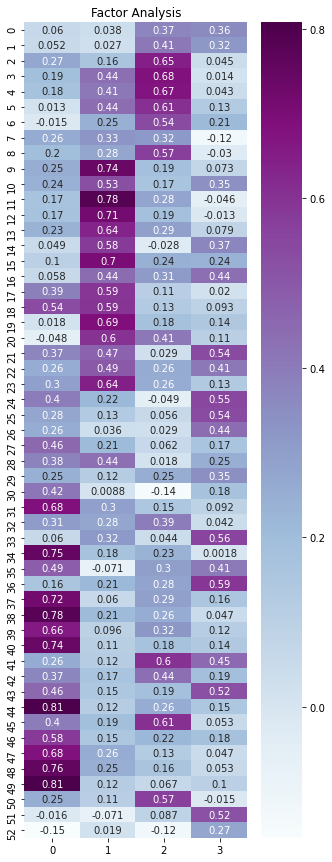

In [ ]:
#Рисование
plt.figure(figsize=(5, 15))
ax = sns.heatmap(loadings, annot=True, cmap="BuPu")
plt.title('Factor Analysis')

1 : 21.546293206716257
2 : 18.93535104208149
3 : 18.139146336007077
4 : 17.5860026282785
5 : 17.149957105634694
6 : 17.02680487416935
7 : 16.557027181875007
8 : 16.17965722263553
9 : 16.034286041483295


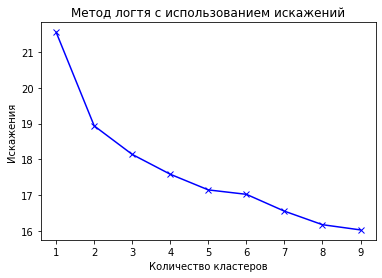

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
X = data.copy()
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажения')
plt.title('Метод логтя с использованием искажений')
plt.show()

1 : 52526.1886792453
2 : 40586.0806451613
3 : 37052.96782879818
4 : 34935.378243978244
5 : 33331.103202614366
6 : 32638.344627594623
7 : 31039.231992117973
8 : 30247.572629940856
9 : 29368.532575757577


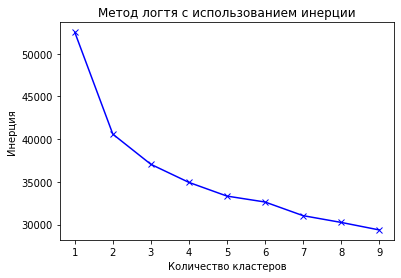

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод логтя с использованием инерции')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

#метод силуэта
for n_clusters in no_of_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(X)
    # Silhouette_score дает
    # среднее значение для всех образцов.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For no of clusters =", n_clusters, " The average silhouette_score is :", silhouette_avg)
#Если значение силуэта близко к 1, выборка хорошо кластеризована и уже назначена очень подходящему кластеру.

For no of clusters = 2  The average silhouette_score is : 0.20477746134320957
For no of clusters = 3  The average silhouette_score is : 0.15657605874153707
For no of clusters = 4  The average silhouette_score is : 0.11734294279736643
For no of clusters = 5  The average silhouette_score is : 0.0917131254193478
For no of clusters = 6  The average silhouette_score is : 0.11025249926587681
For no of clusters = 7  The average silhouette_score is : 0.11944764215061246
For no of clusters = 8  The average silhouette_score is : 0.1039555244849256
For no of clusters = 9  The average silhouette_score is : 0.10766009559824712
For no of clusters = 10  The average silhouette_score is : 0.09213229238201444
For no of clusters = 11  The average silhouette_score is : 0.09086034186506077
